 # How is the development of the programming language Python in Germany? 

The data analysis uses the data from Stackoverflow Annual Developer Survey of the years 2020, 2021 and 2022.

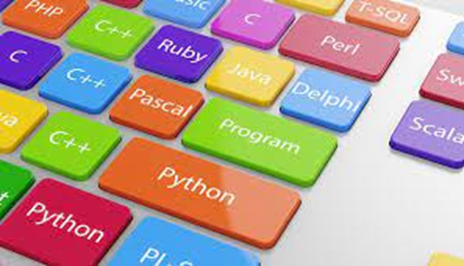

### Introduction

With the progressive digitization of society and the increasing use of artificial intelligence and data science in more and more areas of life, the Python programming language is becoming increasingly important. So also in Germany.  

Has Python already become a standard for these applications? Or at least a quasi-standard?

Real data is analyzed for this report. It is checked whether the programming language Python is actually gaining in importance in Germany or whether the assumptions about "Python becoming the standard" are just rumors.

For the research, we take the data from Stackoverflow's annual developer surveys for the years 2020, 2021 and 2022.

The survey asks more than 150 questions, including:

"What are the programming languages you have to work with?"  
"What are the programming languages you want to work with?"  

which are important for our considerations.


### This is where the code begins

In [1]:
# handle datasets
import numpy as np
import pandas as pd
import zipfile
from collections import Counter

# make plots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# show all columns in the dataframes
pd.pandas.set_option('display.max_columns', None)

In [3]:
# read datasets
with zipfile.ZipFile("stack-overflow-developer-survey-2020.zip", "r") as source:
    source.extractall("stack-overflow-developer-survey-2020")
df_2020 = pd.read_csv("stack-overflow-developer-survey-2020/survey_results_public.csv", sep = ",")

with zipfile.ZipFile("stack-overflow-developer-survey-2021.zip", "r") as source:
    source.extractall("stack-overflow-developer-survey-2021")
df_2021 = pd.read_csv("stack-overflow-developer-survey-2021/survey_results_public.csv", sep = ",")

with zipfile.ZipFile("stack-overflow-developer-survey-2022.zip", "r") as source:
    source.extractall("stack-overflow-developer-survey-2022")
df_2022 = pd.read_csv("stack-overflow-developer-survey-2022/survey_results_public.csv", sep = ",")

### How has the use of the Python programming language developed in Germany in recent years?

In [4]:
# filter dataframes by columns 'Country', 'used languages', 'wanted languages'
country_df_2020 = df_2020[['Country', 'LanguageWorkedWith', 'LanguageDesireNextYear']]
country_df_2021 = df_2021[['Country', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith']]
country_df_2022 = df_2022[['Country', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith']]

In [5]:
# remove rows with Nan in 'Country', 'used languages' or 'wanted languages'
country_df_2020 = country_df_2020.dropna()
country_df_2021 = country_df_2021.dropna()
country_df_2022 = country_df_2022.dropna()

In [6]:
# filter dataframes by Country = 'Germany'
germany_df_2020 = country_df_2020.loc[country_df_2020['Country'] == "Germany"]
germany_df_2021 = country_df_2021.loc[country_df_2021['Country'] == "Germany"]
germany_df_2022 = country_df_2022.loc[country_df_2022['Country'] == "Germany"]

In [7]:
# filter dataframes in colums with 'used languages', 'wanted languages' 
work_lang_df_2020 = germany_df_2020[['LanguageWorkedWith']]
work_lang_df_2021 = germany_df_2021[['LanguageHaveWorkedWith']]
work_lang_df_2022 = germany_df_2022[['LanguageHaveWorkedWith']]

want_lang_df_2020 = germany_df_2020[['LanguageDesireNextYear']]
want_lang_df_2021 = germany_df_2021[['LanguageWantToWorkWith']]
want_lang_df_2022 = germany_df_2022[['LanguageWantToWorkWith']]

In [8]:
# dataframe in series

work_lang_2020 = work_lang_df_2020['LanguageWorkedWith'].str.split(';')
work_lang_2021 = work_lang_df_2021['LanguageHaveWorkedWith'].str.split(';')
work_lang_2022 = work_lang_df_2022['LanguageHaveWorkedWith'].str.split(';')

want_lang_2020 = want_lang_df_2020['LanguageDesireNextYear'].str.split(';')
want_lang_2021 = want_lang_df_2021['LanguageWantToWorkWith'].str.split(';')
want_lang_2022 = want_lang_df_2022['LanguageWantToWorkWith'].str.split(';')

In [9]:
# flatten list

list_work_lang_2020 = [item for sublist in work_lang_2020 for item in sublist]
list_work_lang_2021 = [item for sublist in work_lang_2021 for item in sublist]
list_work_lang_2022 = [item for sublist in work_lang_2022 for item in sublist]

list_want_lang_2020 = [item for sublist in work_lang_2020 for item in sublist]
list_want_lang_2021 = [item for sublist in work_lang_2021 for item in sublist]
list_want_lang_2022 = [item for sublist in work_lang_2022 for item in sublist]

In [10]:
# count datas

count_list_work_lang_2020 = Counter(list_work_lang_2020)
count_list_work_lang_2021 = Counter(list_work_lang_2021)
count_list_work_lang_2022 = Counter(list_work_lang_2022)

count_list_want_lang_2020 = Counter(list_want_lang_2020)
count_list_want_lang_2021 = Counter(list_want_lang_2021)
count_list_want_lang_2022 = Counter(list_want_lang_2022)

In [11]:
# create dictionarys 

def dictionary(data, year):
    new_dict = [{'Language':key, 'Count':value, 'Year':year} for key, value in data.items()]
    return new_dict
             
dict_work_lang_2020 = dictionary(count_list_work_lang_2020, '2020')
dict_work_lang_2021 = dictionary(count_list_work_lang_2021, '2021')
dict_work_lang_2022 = dictionary(count_list_work_lang_2022, '2022')

dict_want_lang_2020 = dictionary(count_list_want_lang_2020, '2020')
dict_want_lang_2021 = dictionary(count_list_want_lang_2021, '2021')
dict_want_lang_2022 = dictionary(count_list_want_lang_2022, '2022')

In [12]:
# dictionarys to dataframes

dict_work_lang_2020 = pd.DataFrame(dict_work_lang_2020)
dict_work_lang_2021 = pd.DataFrame(dict_work_lang_2021)
dict_work_lang_2022 = pd.DataFrame(dict_work_lang_2022)

dict_want_lang_2020 = pd.DataFrame(dict_want_lang_2020)
dict_want_lang_2021 = pd.DataFrame(dict_want_lang_2021)
dict_want_lang_2022 = pd.DataFrame(dict_want_lang_2022)

In [13]:
# normalize counts

def norm_counts(data):

    total_count = data['Count'].sum()
    norm_val = []
    for val in data['Count']:
        norm_val.append(val*100/total_count)

    return norm_val 

# create normalized datas

scal_work_lang_2020 = dict_work_lang_2020.assign(Percentage = norm_counts(dict_work_lang_2020))
scal_work_lang_2021 = dict_work_lang_2021.assign(Percentage = norm_counts(dict_work_lang_2021))
scal_work_lang_2022 = dict_work_lang_2022.assign(Percentage = norm_counts(dict_work_lang_2022))

scal_want_lang_2020 = dict_want_lang_2020.assign(Percentage = norm_counts(dict_want_lang_2020))
scal_want_lang_2021 = dict_want_lang_2021.assign(Percentage = norm_counts(dict_want_lang_2021))
scal_want_lang_2022 = dict_want_lang_2022.assign(Percentage = norm_counts(dict_want_lang_2022))

In [14]:
# append dataframes of work_languages and want_languages 

work_lang = scal_work_lang_2020.append(scal_work_lang_2021)
work_lang = work_lang.append(scal_work_lang_2022)

want_lang = scal_want_lang_2020.append(scal_want_lang_2021)
want_lang = want_lang.append(scal_want_lang_2022)

In [15]:
# get top languages

top_work_lang = work_lang.sort_values(by=['Percentage'], ascending=False).head(21)['Language'].unique()
top_want_lang = want_lang.sort_values(by=['Percentage'], ascending=False).head(21)['Language'].unique()

work_lang_chart = work_lang[work_lang['Language'].isin(top_work_lang)]
want_lang_chart = want_lang[want_lang['Language'].isin(top_want_lang)]

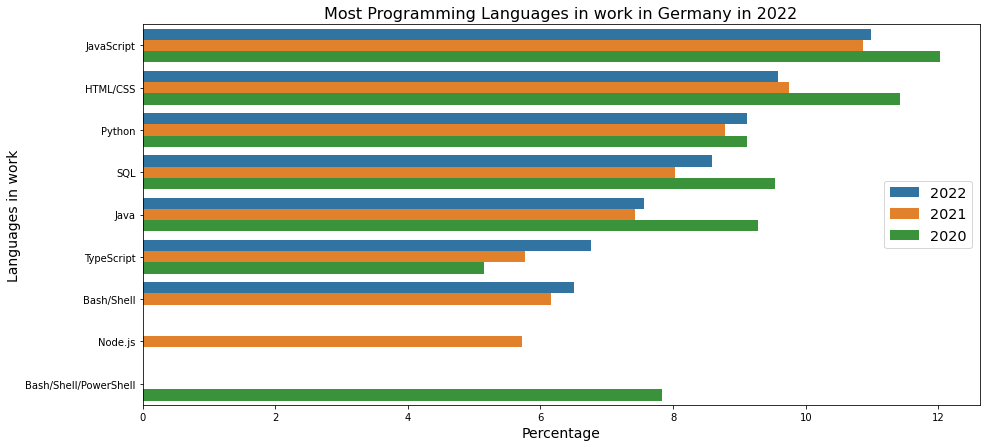

In [16]:
# plot 1: percentage of programming languages in work

plt.figure(figsize=(15,7))
sns.barplot(x = 'Percentage', 
            y = 'Language',
            hue = 'Year',
            data = work_lang_chart.sort_values(by=['Year', 'Percentage'], ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Languages in work", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most Programming Languages in work in Germany in 2022', size = 16)
plt.show()

### 1. What are the programming languages in use in Germany?
This analysis shows that the level of Python usage in Germany has remained about the same in recent years. In contrast, the use of programming languages such as JavaScript, HTML, sql and Java is declining compared to 2020. Overall, this can be interpreted in the way that Python tends to gain importance. 

Overall, the analysis result is somewhat distorted by the fact that the Stack Overflow annual data does not contain corresponding information for all programming languages in the years under review, e.g. for Node.js.

Bash/Shell/PowerShell data is only available for 2020, Bash/Shell data is available for 2021 and 2022. In thought, these two categories can be merged. For a simplified view, it is assumed that Bash/Shell in 2021/2022 is synonymous with Bash/Shell/PowerShell in 2020.

But which programming languages are currently of interest to users so that users want to learn these languages?

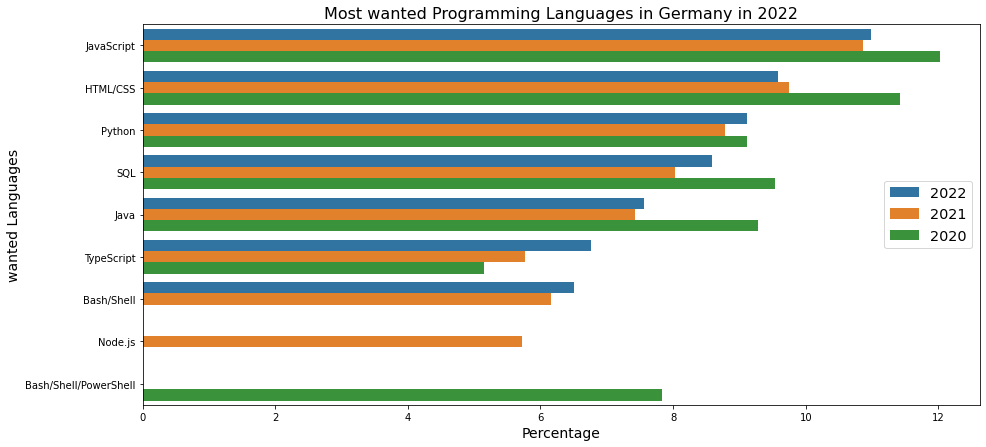

In [17]:
# plot 2: percentage of wanted programming languages

plt.figure(figsize=(15,7))
sns.barplot(x = 'Percentage', 
            y = 'Language',
            hue = 'Year',
            data = want_lang_chart.sort_values(by=['Year', 'Percentage'], ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("wanted Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most wanted Programming Languages in Germany in 2022', size = 16)
plt.show()

### 2. What are the desired programm languages in Germany?
A clear result can be seen here. Python is currently, as it has been for the past two years, the language most valued by users. Although the relative popularity of Python has declined slightly since 2020, this trend can be observed for most programming languages.

The fact that the programming languages TypeScipt and Rust, in contrast to the other programming languages included in the evaluation, have significantly increased in popularity among users, is remarkable.

But here, too, the analysis result is somewhat distorted by the fact that the Stack Overflow Annual Data does not contain corresponding information for all programming languages in the years under review, e.g. for Node.js.

As with the first analysis, Bash/Shell/PowerShell data is only available for 2020, Bash/Shell data is available for 2021 and 2022. In thought, these two categories can be merged. For simplicity, assume that Bash/Shell in 2021/2022 is synonymous with Bash/Shell/PowerShell in 2020.


### Small intermediate result
The analyzes so far have shown that Python is one of the most used programming languages ​​in Germany. In addition, Python is the most preferred programming language by users.

This leads to the following questions:

- Which programming languages do the users who also want Python use?  
- What are the most popular programming languages by Python users

In order to answer this question, a detailed analysis was created. It shows how the programming languages used relate to the desired programming languages, especially with regard to Python.


In [18]:
# datasets with 'Python' in 'LanguageWantToWorkWith'

py_list_work_subset = germany_df_2022['LanguageWantToWorkWith']

py_work_lang_df_2022 = []
for p in py_list_work_subset:
    if 'Python' in p:
        py_work_lang_df_2022.append(p)
        
py_work_lang_df_2022 = pd.DataFrame(py_work_lang_df_2022)


# datasets with 'Python' in 'LanguageHaveWorkedWith'

py_list_want_subset = germany_df_2022['LanguageHaveWorkedWith']

py_want_lang_df_2022 = []
for p in py_list_want_subset:
    if 'Python' in p:
        py_want_lang_df_2022.append(p)
        
py_want_lang_df_2022 = pd.DataFrame(py_want_lang_df_2022)

In [19]:
# add column name

py_work_lang_df_2022.columns = ['LanguageWantToWorkWith']
py_want_lang_df_2022.columns = ['LanguageHaveWorkedWith']

In [20]:
# dataframe in series

py_work_lang_2022 = py_work_lang_df_2022['LanguageWantToWorkWith'].str.split(';')
py_want_lang_2022 = py_want_lang_df_2022['LanguageHaveWorkedWith'].str.split(';')

# length series

length_py_work_lang_2022 = len(py_work_lang_2022)
length_py_want_lang_2022 = len(py_want_lang_2022)

print("length_py_work_lang_2022:", length_py_work_lang_2022)
print("length_py_want_lang_2022:", length_py_want_lang_2022)

length_py_work_lang_2022: 2212
length_py_want_lang_2022: 2554


In [21]:
# flatten list

py_work_lang_2022 = [item for sublist in py_work_lang_2022 for item in sublist] 
py_want_lang_2022 = [item for sublist in py_want_lang_2022 for item in sublist]

In [22]:
# count datas 

count_py_work_lang_2022 = Counter(py_work_lang_2022)
count_py_want_lang_2022 = Counter(py_want_lang_2022)

In [23]:
# create dictionary 

def dictionary(data):
    new_dict = [{'Language':key, 'Count':value} for key, value in data.items()]
    return new_dict
             
dict_py_work_lang_2022 = dictionary(count_py_work_lang_2022)
dict_py_want_lang_2022 = dictionary(count_py_want_lang_2022)

In [24]:
# dictionary to dataframe 

dict_py_work_lang_2022 = pd.DataFrame(dict_py_work_lang_2022)
dict_py_want_lang_2022 = pd.DataFrame(dict_py_want_lang_2022)

In [25]:
#  percentage of languages in work vs wanted Python 
#  percentage of wanted languages vs Python in work

def norm_counts(data, total_count):

    total_count = total_count
    norm_val = []
    for val in data['Count']:
        norm_val.append(val*100/total_count)

    return norm_val 

# create normalized datas

scal_py_work_lang_2022 = dict_py_work_lang_2022.assign(Percentage = norm_counts(dict_py_work_lang_2022, length_py_work_lang_2022))
scal_py_want_lang_2022 = dict_py_want_lang_2022.assign(Percentage = norm_counts(dict_py_want_lang_2022, length_py_want_lang_2022))

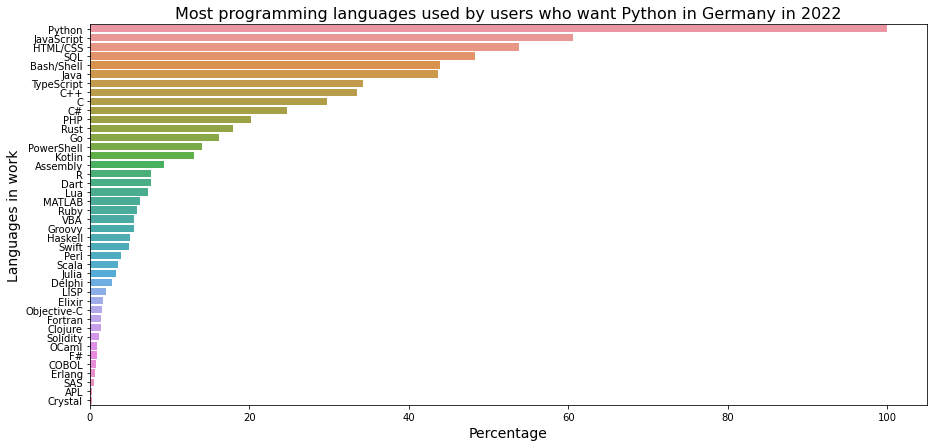

In [26]:
# plot 3:  percentage of Programming Languages in use by users who wanted Python

plt.figure(figsize=(15,7))
sns.barplot(x = 'Percentage', 
            y = 'Language',
            data = scal_py_want_lang_2022.sort_values(by=['Percentage'], ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Languages in work", fontsize = 14)
#plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most programming languages used by users who want Python in Germany in 2022', size = 16)
plt.show()

### 3. What programming languages do the users who want Python use?
Figure 3 shows in detail which programming languages are used by users who would like to work with Python or who would like to learn Python. First up is Python. Users who want to work with Python want to continue working with Python or expand their skills. That's no surprise.  

Other programming languages used by Python users in the top 10 are JavaScript, HTML/CSS, SQL, Bash/Shell, Java, Type Script, C++, C, C#.  

At the other end of the scale are the programming languages whose users have no particular affinity with Python. These languages are Crystal, APL, SAS, Erlang and COBOL.

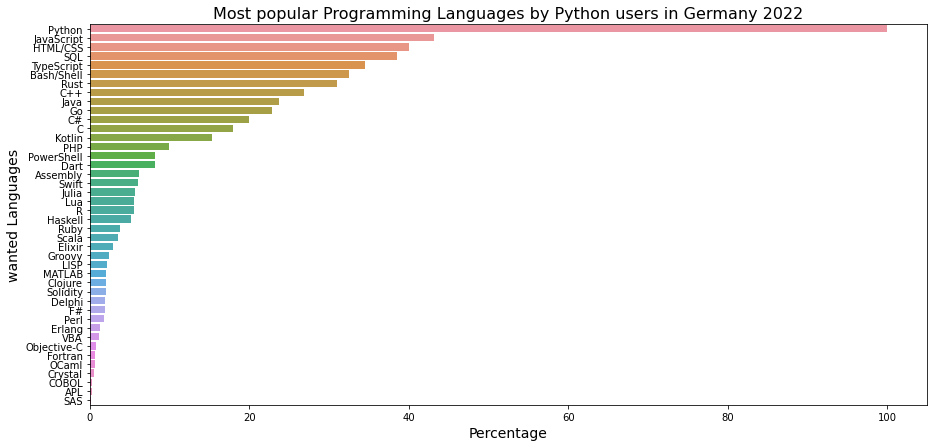

In [27]:
# plot 4:  percentage of wanted programming languages by Python users
plt.figure(figsize=(15,7))
sns.barplot(x = 'Percentage', 
            y = 'Language',
            data = scal_py_work_lang_2022.sort_values(by=['Percentage'], ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("wanted Languages", fontsize = 14)
#plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most popular Programming Languages by Python users in Germany 2022', size = 16)
plt.show()

### 4. What are the most popular programming languages by Python users?
This detailed evaluation shows which programming languages the users who already work with Python prefer or would like to learn. Again, Python comes first. This statement overlaps with the statement in topic 3.  

Other programming languages preferred by Python users in the top 10 are JavaScript, HTML/CSS, SQL, Type Script, Bash/Shell, Rust, C++, Java, Go.  

At the other end of the scale are the programming languages for which Python users have no particular affinity. These languages are SAS, APL, COBOL, Crystal and OCaml.

From the representations in Figure 3 and Figure 4 it can be seen:  
- Users who use Python also want to develop their skills in Python or continue working with Python.
- The programming languages that Python users prefer are essentially the programming languages whose users prefer Python.

### Conclusion
This article covers the most used and favorite programming languages. Particular attention was paid to the current development of Python in Germany. The data was based on the annual Stackoverflow surveys for the years 2020, 2021 and 2022.
1. The analysis has shown that the programming languages ​​JavaScript, HTML, sql and Java still dominate in use. However, Python is showing a slight upward trend.
2. The most favored programming language in Germany in recent years is Python.
3. Python is favored by users working with Python, JavaScript, HTML/CSS, SQL, Bash/Shell.
4. Python users prefer JavaScript, HTML/CSS, SQL, Type Script in addition to Python.

See also the link to my medium post in References. 

### References
Stackoverflow Developer Survey Data: https://insights.stackoverflow.com/survey  
Medium: https://medium.com/@martinpertz/how-is-the-development-of-the-programming-language-python-in-germany-bdd5e86ef426